# Exercise notebook 2: Cleaning up our act
This Jupyter notebook, for Week 2 of The Open University's [Learn to code for Data Analysis](https://www.futurelearn.com/courses/learn-to-code/) course, has code examples and coding activities for you. Remember to run the code in this notebook before you start.

You'll come across steps in the FutureLearn course directing you to this notebook. Once you've done the exercise, go back to FutureLearn to discuss it with your fellow learners and course facilitators and mark it as complete. 

In [1]:
import sys
sys.version

'3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]'

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
show_versions()


INSTALLED VERSIONS
------------------
commit: None
python: 3.6.1.final.0
python-bits: 64
OS: Windows
OS-release: 7
machine: AMD64
processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder: little
LC_ALL: None
LANG: None
LOCALE: None.None

pandas: 0.20.1
pytest: 3.0.7
pip: 9.0.1
setuptools: 27.2.0
Cython: 0.25.2
numpy: 1.12.1
scipy: 0.19.0
xarray: None
IPython: 5.3.0
sphinx: 1.5.6
patsy: 0.4.1
dateutil: 2.6.0
pytz: 2017.2
blosc: None
bottleneck: 1.2.1
tables: 3.2.2
numexpr: 2.6.2
feather: None
matplotlib: 2.0.2
openpyxl: 2.4.7
xlrd: 1.0.0
xlwt: 1.2.0
xlsxwriter: 0.9.6
lxml: 3.7.3
bs4: 4.6.0
html5lib: 0.999
sqlalchemy: 1.1.9
pymysql: None
psycopg2: None
jinja2: 2.9.6
s3fs: None
pandas_gbq: None
pandas_datareader: None


## Exercise 1: Dataframes and CSV files

To read a CSV file into a dataframe you need to call the pandas function called <code>read_csv()</code>. The simplest usage of this function is with a single argument, a string that holds the name of the CSV file, for example.

In [3]:
df = read_csv('WHO POP TB all.csv')

In [4]:
df.head()

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00


In [5]:
df.head(10)

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00
7,Armenia,2977,170.00
8,Australia,23343,45.00
9,Austria,8495,29.00


In [6]:
df.tail(5)

,Country,Population (1000s),TB deaths
189,Venezuela (Bolivarian Republic of),30405,480.0
190,Viet Nam,91680,17000.0
191,Yemen,24407,990.0
192,Zambia,14539,3600.0
193,Zimbabwe,14150,5700.0


### Dataframe attributes

A dataframe attribute is like a variable that can only be accessed in the context of a dataframe. One such attribute is <code>columns</code> which holds a dataframe's column names.

In [7]:
df.columns

Index(['Country', 'Population (1000s)', 'TB deaths'], dtype='object')

### Dataframe rows
A dataframe has a default integer index for its rows, which starts at zero <code>0</code>. The `irow()` method returns the row at the given index.

In [8]:
df.iloc[0] # first row, index 0

Country               Afghanistan
Population (1000s)          30552
TB deaths                   13000
Name: 0, dtype: object

In [9]:
df.iloc[2] # third row, index 2

Country               Algeria
Population (1000s)      39208
TB deaths                5100
Name: 2, dtype: object

### The <code>head()</code> method

The `head()` method returns a dataframe with the first rows, as many as given in the argument. By default, if the argument is missing, it returns the first five rows.

In [10]:
df.head() # first five rows

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00


In [11]:
df.head(7) # first seven rows

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00


### The <code>tail()</code> method
The <code>tail()</code> method is similar to the <code>head()</code> method. If no argument is used, the last five rows of the dataframe are returned, otherwise the number of rows returned is dependent on the argument.

In [12]:
df.tail() # last five rows

,Country,Population (1000s),TB deaths
189,Venezuela (Bolivarian Republic of),30405,480.0
190,Viet Nam,91680,17000.0
191,Yemen,24407,990.0
192,Zambia,14539,3600.0
193,Zimbabwe,14150,5700.0


### Selecting and displaying columns in a dataframe
You found in Week 1 that you can select and display the values for a single dataframe column by puting the name of the column (in quotes) within square brackets immediately after the dataframe's name. However you can also select and display the values for multiple columns too.

To get multiple columns you need to use a list. A list in Python is a number of items separated by commas within square brackets, for example `['Country', 'Population (1000s)']`. This list is then put within square brackets immediately after the dataframe's name. The resulting expression represents a new dataframe, just with those columns, and therefore any dataframe method can be applied to it, like for example `head()`:

In [13]:
df[['Country', 'Population (1000s)']].head()

,Country,Population (1000s)
0,Afghanistan,30552
1,Albania,3173
2,Algeria,39208
3,Andorra,79
4,Angola,21472


### Applying methods to a dataframe column
The `irow()`, <code>head()</code> and <code>tail()</code> methods discussed above can be used with single columns.

In [14]:
df['TB deaths'].iloc[2] # third value of deaths column

5100.0

In [15]:
df['Population (1000s)'].tail() # last five values of population column      

189    30405
190    91680
191    24407
192    14539
193    14150
Name: Population (1000s), dtype: int64

### Tasks

In the code cell below, write the code to get and display the 55th row in the dataframe <code>df</code>.

In [16]:
df.iloc[54] # 55th row of dataframe

Country               El Salvador
Population (1000s)           6340
TB deaths                      61
Name: 54, dtype: object

In the code cell below write the code to display the first 10 rows of the dataframe <code>df</code>.

In [17]:
df.head(10)

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00
7,Armenia,2977,170.00
8,Australia,23343,45.00
9,Austria,8495,29.00


In the code cell below, select and display the first eight rows from the <code>'Country'</code> and <code>'TB deaths'</code> columns.

In [18]:
df[["Country", "TB deaths"]].head(8)

,Country,TB deaths
0,Afghanistan,13000.00
1,Albania,20.00
2,Algeria,5100.00
3,Andorra,0.26
4,Angola,6900.00
5,Antigua and Barbuda,1.20
6,Argentina,570.00
7,Armenia,170.00


**Now go back to the 'Dataframes and CSV files' step in FutureLearn to discuss and mark it complete.**

## Exercise 2: Comparison operators
Python has the following comparison operators:

    == (equals)
    != (not equal)
    < (less than)
    > (greater than)
    <= (less than or equal to)
    >= (greater than or equal to)

The following code will get and display all the rows in `df` where it is `True` that the value in the `'Population (1000s)'` column is greater than `80000`.

In [19]:
df[df['Population (1000s)'] > 80000]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000.0
23,Brazil,200362,4400.0
36,China,1393337,41000.0
53,Egypt,82056,550.0
58,Ethiopia,94101,30000.0
65,Germany,82727,300.0
77,India,1252140,240000.0
78,Indonesia,249866,64000.0
85,Japan,127144,2100.0
109,Mexico,122332,2200.0


### Task
In the code cell below write code to find all the rows in <code>df</code> where TB deaths exceed 10000.

In [20]:
df[df['TB deaths'] > 10000]

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.0
13,Bangladesh,156595,80000.0
36,China,1393337,41000.0
47,Democratic Republic of the Congo,67514,46000.0
58,Ethiopia,94101,30000.0
77,India,1252140,240000.0
78,Indonesia,249866,64000.0
100,Madagascar,22925,12000.0
115,Mozambique,25834,18000.0
116,Myanmar,53259,26000.0


**Now go back to the 'Comparison operators' step in FutureLearn to discuss and mark it complete.**

## Exercise 3: Bitwise operators

Pandas has two operators to make more complicated queries. Use the operator `&` (means 'and') to select rows where two conditions are both true. Use the operator `|` (means 'or') to select rows where at least one condition is true. Don't forget to put parentheses around _each_ comparison. For example, the following expression selects only countries with a population over 80 million inhabitants **and** with more that 10 thousand deaths.

In [21]:
df[(df['Population (1000s)'] > 80000) & (df['TB deaths'] > 10000)]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000.0
36,China,1393337,41000.0
58,Ethiopia,94101,30000.0
77,India,1252140,240000.0
78,Indonesia,249866,64000.0
124,Nigeria,173615,160000.0
128,Pakistan,182143,49000.0
134,Philippines,98394,27000.0
141,Russian Federation,142834,17000.0
190,Viet Nam,91680,17000.0


If the same columns will be used repeatedly in the program, the code becomes more readable if written as follows:

In [22]:
population = df['Population (1000s)']
deaths = df['TB deaths']
df[(population > 80000) & (deaths > 10000)]

,Country,Population (1000s),TB deaths
13,Bangladesh,156595,80000.0
36,China,1393337,41000.0
58,Ethiopia,94101,30000.0
77,India,1252140,240000.0
78,Indonesia,249866,64000.0
124,Nigeria,173615,160000.0
128,Pakistan,182143,49000.0
134,Philippines,98394,27000.0
141,Russian Federation,142834,17000.0
190,Viet Nam,91680,17000.0


### Task
In the code cell below find  all the countries where the Population (1000s) is **less than or equal to** 50000 **or** TB deaths are **greater than or equal to** 20000.

In [23]:
population = df['Population (1000s)']
deaths = df['TB deaths']
df[(population <= 500000) | (deaths >= 20000)]  

,Country,Population (1000s),TB deaths
0,Afghanistan,30552,13000.00
1,Albania,3173,20.00
2,Algeria,39208,5100.00
3,Andorra,79,0.26
4,Angola,21472,6900.00
5,Antigua and Barbuda,90,1.20
6,Argentina,41446,570.00
7,Armenia,2977,170.00
8,Australia,23343,45.00
9,Austria,8495,29.00


**Now go back to the 'Bitwise operators' step in FutureLearn to discuss and mark it complete.**

## Exercise 4: Display rows from dataframe

You have downloaded the file London_2014.csv from our website, it can now be read into a dataframe.

In [24]:
london = read_csv('London_2014.csv')
london.head()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees<br />
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186<br />
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214<br />
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219<br />
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211<br />
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199<br />


### Removing initial spaces

There are too many columns for the dataframe to fit horizontally in this notebook, but they can be displayed separately.

In [25]:
london.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressurehPa',
       ' Mean Sea Level PressurehPa', ' Min Sea Level PressurehPa',
       ' Max VisibilityKm', ' Mean VisibilityKm', ' Min VisibilitykM',
       ' Max Wind SpeedKm/h', ' Mean Wind SpeedKm/h', ' Max Gust SpeedKm/h',
       'Precipitationmm', ' CloudCover', ' Events', 'WindDirDegrees<br />'],
      dtype='object')

This shows that <code>' Max Wind SpeedKm/h'</code> is prefixed by a space, as are other columm names such as <code>' Mean Humidity'</code> and <code>' Max Sea Level PressurehPa'</code>.

The  <code>read_csv()</code> function has interpreted spaces after commas as being part of the next value. This can be rectified  easily by adding another argument to the <code>read_csv()</code> function to skip the initial spaces after a comma.

In [26]:
london = read_csv('London_2014.csv', skipinitialspace=True)

### Removing extra characters

Another problem shown above is that the final column is called <code>'WindDirDegrees&lt; br /&gt;'</code>.

When the dataset was exported from the Weather Underground web site html line breaks were automatically added to each line in the file which <code>read_csv()</code> has interpreted as part of the column name and its values. This can be seen more clearly by looking at more values in the final column:

In [27]:
london['WindDirDegrees<br />'].head()

0    186<br />
1    214<br />
2    219<br />
3    211<br />
4    199<br />
Name: WindDirDegrees<br />, dtype: object

<code>'WindDirDegrees&lt; br /&gt;'</code> can be changed to <code>'WindDirDegrees'</code> with the <code>rename()</code> method as follows:

In [28]:
london = london.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

To remove the <code>'&lt; br /&gt;'</code> html line breaks from the values in the <code>'WindDirDegrees'</code> column you need to use the string method <code>rstrip()</code> which is used to remove characters from the *end* or 'rear' of a string:

In [29]:
london['WindDirDegrees'] = london['WindDirDegrees'].str.rstrip('<br />')

Display the first few rows of the <code>'WindDirDegrees'</code> to confirm the change:

In [30]:
london['WindDirDegrees'].head()

0    186
1    214
2    219
3    211
4    199
Name: WindDirDegrees, dtype: object

### Missing values

Missing (also called null or not available) values are marked as NaN (not a number) in dataframes.

In [31]:
london['Events'].tail()

360    Rain
361     NaN
362     NaN
363     NaN
364     Fog
Name: Events, dtype: object

The `isnull()` method returns `True` for each row in a column that has a null value. The method can be used to select and display those rows. Scroll the table below to the right to check that the events column is only showing missing values.

In [32]:
london[london['Events'].isnull()]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
32,2014-2-2,10,8,5,4,3,1,93,71,43,...,31,16,10,37,24,47.0,0.00,2.0,NaN,216
33,2014-2-3,8,6,3,5,3,2,93,79,55,...,31,15,10,32,18,NaN,0.00,4.0,NaN,133
43,2014-2-13,8,6,3,2,1,-1,81,66,45,...,31,15,10,42,27,48.0,0.00,2.0,NaN,236
52,2014-2-22,12,8,4,5,3,1,87,68,38,...,31,16,10,29,21,NaN,0.00,2.0,NaN,228
63,2014-3-5,13,7,0,4,2,-1,100,72,40,...,31,15,8,21,6,NaN,0.25,1.0,NaN,248
64,2014-3-6,13,9,5,7,5,3,93,77,50,...,31,15,7,32,14,42.0,0.00,2.0,NaN,206
66,2014-3-8,16,11,7,7,4,2,93,65,29,...,31,11,6,27,18,NaN,0.00,6.0,NaN,156
67,2014-3-9,19,12,6,7,4,3,81,58,28,...,26,9,5,24,10,34.0,0.00,NaN,NaN,170
68,2014-3-10,13,8,4,8,4,2,87,73,57,...,31,12,6,23,8,NaN,0.00,6.0,NaN,27
70,2014-3-12,16,9,2,8,4,1,93,76,40,...,19,9,3,11,8,NaN,0.00,4.0,NaN,31


One way to deal with missing values is to replace them by some value. The column method `fillna()` fills all not available value cells with the value given as argument. In the example below, each missing event is replaced by the empty string.

In [33]:
london['Events'] = london['Events'].fillna('')
london[london['Events'].isnull()]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees


All `NaN` values of `Events` column are replaced by the empty string.

In [34]:
london

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211
4,2014-1-5,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199
5,2014-1-6,12,10,8,11,8,6,94,78,60,...,31,12,5,50,29,61.0,2.03,4.0,Rain,219
6,2014-1-7,12,10,8,8,7,6,87,78,63,...,31,13,5,39,27,55.0,5.08,3.0,Rain,219
7,2014-1-8,12,9,7,11,7,6,94,85,69,...,27,14,6,24,18,37.0,1.02,3.0,Rain,197
8,2014-1-9,11,8,5,11,5,2,94,76,53,...,31,13,5,40,26,60.0,0.00,4.0,Rain,247
9,2014-1-10,11,7,2,7,4,2,93,85,66,...,31,17,10,24,13,32.0,0.25,3.0,Rain,216


The empty dataframe (no rows) confirms there are no more missing event values.

Another way to deal with missing values is to ignore rows with them. The `dropna()` dataframe method returns a new dataframe where all rows with at least one non-available value have been removed.

In [35]:
london.dropna()

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2014-1-1,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186
1,2014-1-2,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214
2,2014-1-3,11,8,6,9,5,2,94,76,54,...,31,12,0,50,29,69.0,7.11,2.0,Rain-Thunderstorm,219
3,2014-1-4,9,6,3,8,6,2,93,85,65,...,31,12,5,35,21,39.0,9.91,4.0,Rain,211
5,2014-1-6,12,10,8,11,8,6,94,78,60,...,31,12,5,50,29,61.0,2.03,4.0,Rain,219
6,2014-1-7,12,10,8,8,7,6,87,78,63,...,31,13,5,39,27,55.0,5.08,3.0,Rain,219
7,2014-1-8,12,9,7,11,7,6,94,85,69,...,27,14,6,24,18,37.0,1.02,3.0,Rain,197
8,2014-1-9,11,8,5,11,5,2,94,76,53,...,31,13,5,40,26,60.0,0.00,4.0,Rain,247
9,2014-1-10,11,7,2,7,4,2,93,85,66,...,31,17,10,24,13,32.0,0.25,3.0,Rain,216
15,2014-1-16,11,8,6,9,6,4,94,85,67,...,31,14,3,27,18,47.0,3.05,3.0,Rain,188


Note that the table above has fewer than 251 of the original 365 rows, so there must be further null values besides the 114 missing events.

### Changing the value type of a column

The type of every column in a dataframe can be determined by looking at the dataframe's `dtypes` attribute, like this:

In [36]:
london.dtypes

GMT                            object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                 object
dtype: object

The type of all the values in a column can be changed using the <code>astype()</code> method. The following code will change the values in the <code>'WindDirDegrees'</code> column from strings (`object`) to integers (<code>int64</code>).

In [37]:
london['WindDirDegrees'] = london['WindDirDegrees'].astype('int64')

The function `to_datetime()` is needed to change the values in the `'GMT'` column from strings (`object`) to dates (`datetime64`):

In [38]:
london['GMT'] = to_datetime(london['GMT'])
london.dtypes

GMT                           datetime64[ns]
Max TemperatureC                       int64
Mean TemperatureC                      int64
Min TemperatureC                       int64
Dew PointC                             int64
MeanDew PointC                         int64
Min DewpointC                          int64
Max Humidity                           int64
Mean Humidity                          int64
Min Humidity                           int64
Max Sea Level PressurehPa              int64
Mean Sea Level PressurehPa             int64
Min Sea Level PressurehPa              int64
Max VisibilityKm                       int64
Mean VisibilityKm                      int64
Min VisibilitykM                       int64
Max Wind SpeedKm/h                     int64
Mean Wind SpeedKm/h                    int64
Max Gust SpeedKm/h                   float64
Precipitationmm                      float64
CloudCover                           float64
Events                                object
WindDirDeg

Values of type `datetime64` can be created using the `datetime()` function where the first integer argument is the year, the second the month and the third the day. 
The code below will get and display the row in the dataframe whose `'GMT'` value is 4th June 2014.

In [39]:
london[london['GMT'] == datetime(2014, 6, 4)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
154,2014-06-04,14,11,8,11,9,3,94,78,47,...,31,12,7,47,13,64.0,2.03,4.0,Rain-Thunderstorm,230


Queries such as 'Return all the rows where the date is between 8 December and 12 December' can be made:

In [40]:
dates = london['GMT']
start = datetime(2014, 12, 8)
end = datetime(2014, 12, 12)
london[(dates >= start) & (dates <= end)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
341,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2.0,Rain,270
342,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52.0,0.25,5.0,Rain,224
343,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2.0,Rain,246
344,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2.0,Rain,246
345,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55.0,1.02,3.0,Rain,253


### Tasks

Now that the wind direction is given by a number, write code to select all days that had a northerly wind. Hint: select the rows where the direction is greater than or equal to 350 **or** smaller than or equal to 10, as the compass rose shows.

In [41]:
windir = london['WindDirDegrees']
london[(windir >= 350) | (windir <= 10)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
84,2014-03-26,9,6,2,4,2,-1,100,80,39,...,27,10,1,26,10,NaN,2.03,4.0,Fog-Rain,3
90,2014-04-01,19,13,7,11,9,6,100,80,39,...,19,7,0,16,5,NaN,0.00,4.0,Fog-Rain,6
100,2014-04-11,16,12,9,5,4,2,71,53,28,...,31,18,10,13,8,NaN,0.00,1.0,,351
110,2014-04-21,19,12,5,11,8,4,100,78,31,...,26,7,0,14,6,NaN,9.91,3.0,Fog-Rain-Thunderstorm,356
174,2014-06-24,24,19,13,15,12,9,94,66,27,...,31,12,0,23,8,37.0,0.00,3.0,Fog,350
179,2014-06-29,19,16,12,11,9,5,88,65,31,...,31,16,10,19,10,NaN,0.00,2.0,Rain,9
190,2014-07-10,22,18,14,13,11,9,82,64,44,...,31,19,10,16,14,NaN,0.00,3.0,,1
208,2014-07-28,23,19,14,16,12,9,94,66,33,...,26,12,2,21,10,NaN,17.02,2.0,Rain-Thunderstorm,3
249,2014-09-07,21,17,13,14,12,8,94,71,41,...,23,10,2,11,6,NaN,0.00,4.0,,354
250,2014-09-08,22,16,10,13,9,7,94,64,28,...,27,12,5,11,6,NaN,0.00,1.0,,351


In the code cell below, write code to get and display all the rows in the dataframe that are beween 1 April 2014 and 
11 April 2014.

In [42]:
dates = london['GMT']
start = datetime(2014, 4, 1)
end = datetime(2014, 4, 11)
london[(dates >= start) & (dates <= end)]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
90,2014-04-01,19,13,7,11,9,6,100,80,39,...,19,7,0,16,5,NaN,0.00,4.0,Fog-Rain,6
91,2014-04-02,18,14,11,11,9,7,88,71,48,...,10,8,5,23,13,NaN,0.00,1.0,Rain,85
92,2014-04-03,18,14,11,11,9,9,88,75,52,...,21,7,3,26,11,NaN,0.00,5.0,,96
93,2014-04-04,15,12,9,10,8,6,88,71,46,...,31,11,2,24,14,NaN,0.00,5.0,,253
94,2014-04-05,14,10,6,11,8,5,100,83,56,...,31,12,1,26,13,50.0,0.00,5.0,Fog-Rain,197
95,2014-04-06,16,14,12,12,12,11,94,88,67,...,31,12,5,35,21,48.0,2.03,6.0,Rain,213
96,2014-04-07,14,11,8,12,11,6,94,87,76,...,31,14,5,29,23,42.0,2.03,5.0,Rain,209
97,2014-04-08,14,9,5,6,3,-1,87,64,26,...,31,15,10,39,23,NaN,0.00,2.0,Rain,269
98,2014-04-09,17,10,4,7,6,3,93,68,38,...,31,14,6,23,13,NaN,0.00,2.0,,261
99,2014-04-10,16,11,6,6,5,3,93,62,31,...,31,14,9,19,10,NaN,0.00,3.0,,278


In the cell below, write two lines of code to display the first five rows that have a missing value in the `'Max Gust SpeedKm/h'` column. Hint: first select the missing value rows and store them in a new dataframe, then display the first five rows of the new dataframe.

In [43]:
london[london['Max Gust SpeedKm/h'].isnull()].head(5)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
4,2014-01-05,12,7,1,11,4,-1,100,88,77,...,31,14,5,35,16,NaN,0.25,5.0,Rain,199
10,2014-01-11,9,4,0,7,3,-1,100,80,51,...,31,12,6,24,14,NaN,0.00,4.0,Rain,259
11,2014-01-12,10,4,-2,9,3,-2,100,91,79,...,31,9,1,32,10,NaN,0.51,6.0,Fog-Rain,126
12,2014-01-13,9,7,5,8,4,3,93,85,71,...,31,16,5,34,19,NaN,5.08,2.0,Rain,205
13,2014-01-14,7,4,1,5,2,0,100,82,55,...,31,15,10,21,13,NaN,0.25,3.0,Rain,242


**Now go back to the 'Changing the value types of columns' step in FutureLearn to discuss and mark it complete.**

## Exercise 5: Every picture tells a story

The following line of code tells Jupyter to display inside this notebook any graph that is created.

In [44]:
%matplotlib inline

The `plot()` method can make a graph of the values in a column. Gridlines are turned on by the `grid` argument.

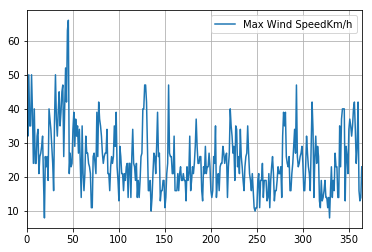

In [45]:
london[['Max Wind SpeedKm/h']].plot(grid=True);
# Add a semicolon at the end of the matplotlib statement to remove noise of execution of the statements.

The graph can be made bigger by giving the method a `figsize=(x,y)` argument where `x` and `y` are integers that determine the length of the x-axis and y-axis.

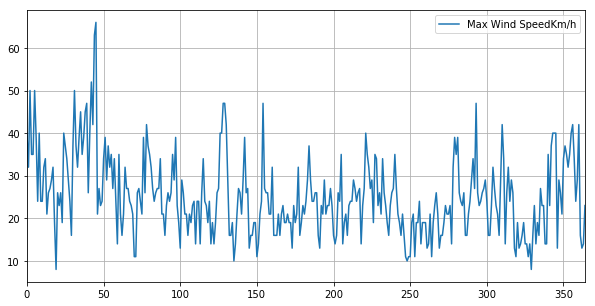

In [46]:
london[['Max Wind SpeedKm/h']].plot(grid=True, figsize=(10,5));

Multiple lines can be plotted by selecting multiple columns.

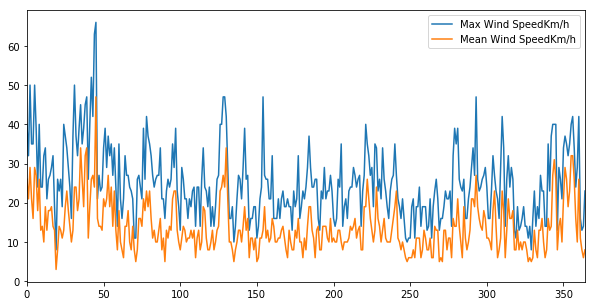

In [47]:
london[['Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h']].plot(grid=False, figsize=(10,5));

### Task

In the cell below, write code to plot the minimum, mean, and maximum temperature during 2014 in London.

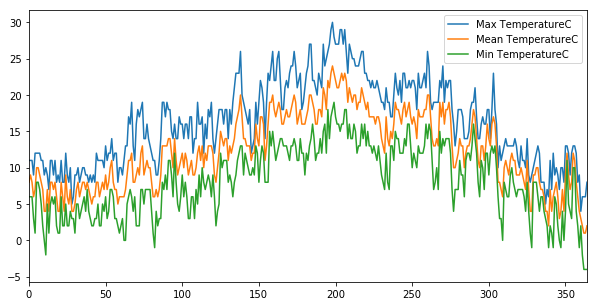

In [48]:
london[['Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC']].plot(grid=False, figsize=(10,5));

**Now go back to the 'Every picture tells a story' step in FutureLearn to discuss and mark it complete.**

## Exercise 6: Changing a dataframe's index
Changing the dataframe's index from the default to `datetime64` values is done by assigning to the dataframe's `index` attribute the contents of the `'GMT`' column, like this:

In [49]:
london.index = london['GMT']
london.head(2)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-01-01,2014-01-01,11,8,6,9,7,4,94,86,73,...,31,11,2,40,26,66.0,9.91,4.0,Rain,186
2014-01-02,2014-01-02,11,9,6,9,6,4,94,81,60,...,31,15,5,32,21,50.0,1.02,2.0,Rain,214


The `irow()` method can still be used to get and display rows, but now you can now also use the `datetime64` index to get a row using the dataframe's `ix` (index) property, like this:

In [50]:
london.loc[datetime(2014, 1, 1)]

GMT                           2014-01-01 00:00:00
Max TemperatureC                               11
Mean TemperatureC                               8
Min TemperatureC                                6
Dew PointC                                      9
MeanDew PointC                                  7
Min DewpointC                                   4
Max Humidity                                   94
Mean Humidity                                  86
Min Humidity                                   73
Max Sea Level PressurehPa                    1002
Mean Sea Level PressurehPa                    993
Min Sea Level PressurehPa                     984
Max VisibilityKm                               31
Mean VisibilityKm                              11
Min VisibilitykM                                2
Max Wind SpeedKm/h                             40
Mean Wind SpeedKm/h                            26
Max Gust SpeedKm/h                             66
Precipitationmm                              9.91


A query such as *'Return all the rows where the date is between December 8th and December 12th'* can now be done  succinctly like this:

In [51]:
london.loc[datetime(2014,12,8) : datetime(2014,12,12)]

#The meaning of the above code is get the rows beween and including 
#the indices datetime(2014,12,8) and datetime(2014,12,12)

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,
2014-12-08,2014-12-08,7,4,1,2,1,-1,93,76,51,...,31,17,10,23,13,NaN,0.00,2.0,Rain,270
2014-12-09,2014-12-09,12,6,-1,11,3,-1,100,86,64,...,31,15,3,37,14,52.0,0.25,5.0,Rain,224
2014-12-10,2014-12-10,9,7,6,11,3,1,90,70,44,...,31,18,3,40,27,NaN,0.00,2.0,Rain,246
2014-12-11,2014-12-11,10,8,5,6,3,2,82,72,51,...,31,15,10,40,31,NaN,0.25,2.0,Rain,246
2014-12-12,2014-12-12,9,6,2,9,4,-1,94,79,59,...,31,11,3,40,26,55.0,1.02,3.0,Rain,253


Now we have a `datetime64` index, let's plot `'Max Wind SpeedKm/h'` again:

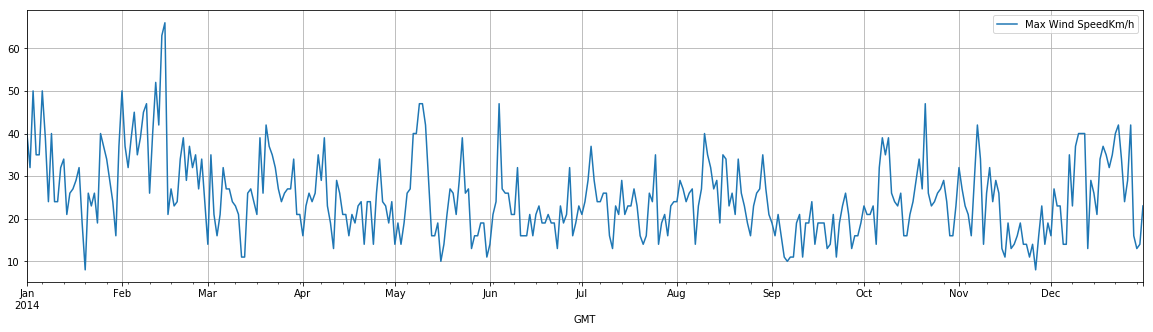

In [52]:
london[['Max Wind SpeedKm/h']].plot(grid=True, figsize=(20,5));

Now it is much clearer that the worst winds were in mid February.

### Task
Use the code cell below to plot the values of `'Mean Humidity'` during spring (full months of March, April and May).

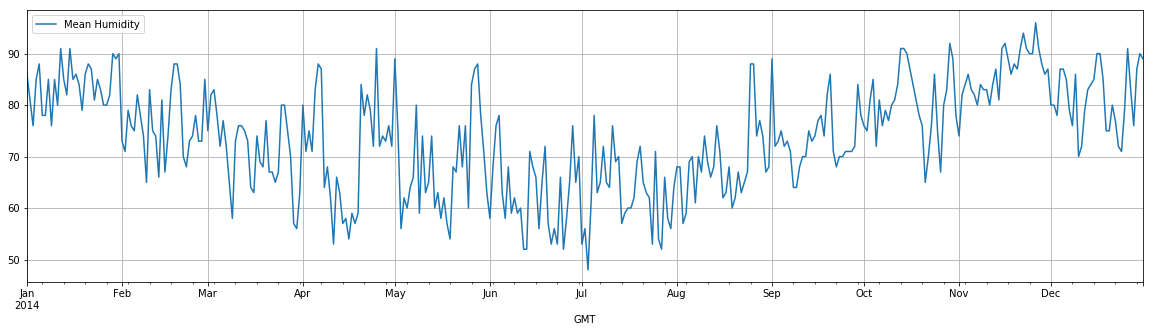

In [53]:
mean_humidity = london[['Mean Humidity']]
start_date = datetime(2014, 3, 1)
end_date = datetime(2014, 5, 31)
spring_df = mean_humidity.loc[start_date : end_date]
mean_humidity.plot(grid=True, figsize=(20,5));

**Now go back to the 'Changing a dataframe's index' step in FutureLearn to discuss and mark it complete.**